<a href="https://colab.research.google.com/github/wachira-samuel/Demo/blob/main/Lesson_2.(tensorflow)ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
tf.keras.datasets??

## IMPORTING THE DATASET

In [4]:
from keras.datasets import mnist

In [14]:
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = (x_train / 255.0).astype(np.float32), (x_test / 255.0).astype(np.float32)


In [15]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [8]:
len(x_train)

60000

In [9]:
len(x_test)

10000

## VISUALIZING THE DATASETS

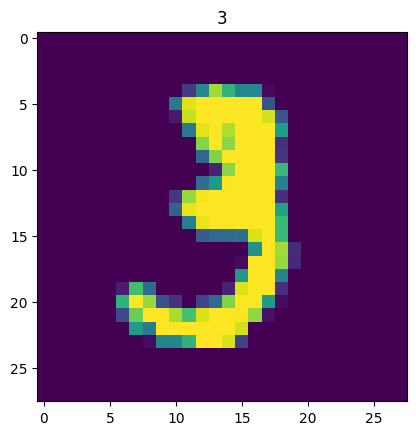

In [10]:
plt.imshow(x_train[10])
plt.title(y_train[10])
plt.show()

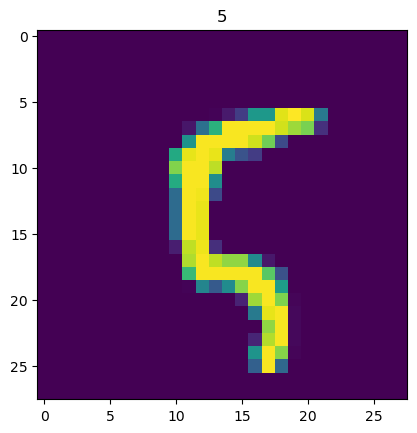

In [ ]:
plt.imshow(x_train[100])
plt.title(y_train[100])
plt.show()

## BUILDING THE MODEL

In [16]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.losses import SparseCategoricalCrossentropy


* Technique_1

In [17]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(10)
])


* Technique_2

In [18]:
model_2 = Sequential()
model_2.add(Flatten(input_shape = (28, 28)))
model_2.add(Dense(128, activation = "relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(10))

## VISUALIZING THE MODEL

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
from keras.utils import plot_model

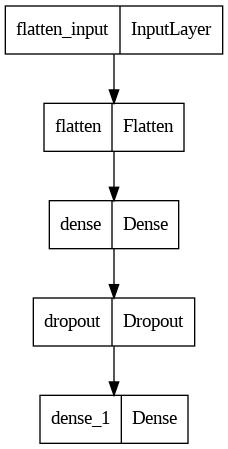

In [21]:
plot_model(model)

In [22]:
loss_fn = SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## TRAINING THE MODEL

In [ ]:
hist = model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2921 - accuracy: 0.9153
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1406 - accuracy: 0.9582
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1089 - accuracy: 0.9668
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0872 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0760 - accuracy: 0.9765


## VISUALIZING MODEL ACCURACY AND LOSS

In [ ]:
acc = hist.history["accuracy"]
loss = hist.history["loss"]
epoch_range = range(5)


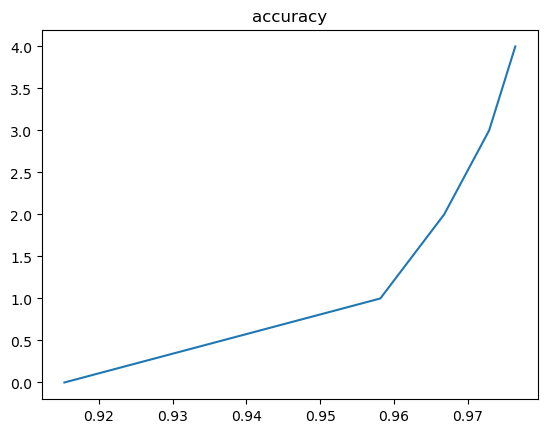

In [ ]:
plt.plot(acc, epoch_range)
plt.title("accuracy")
plt.show()

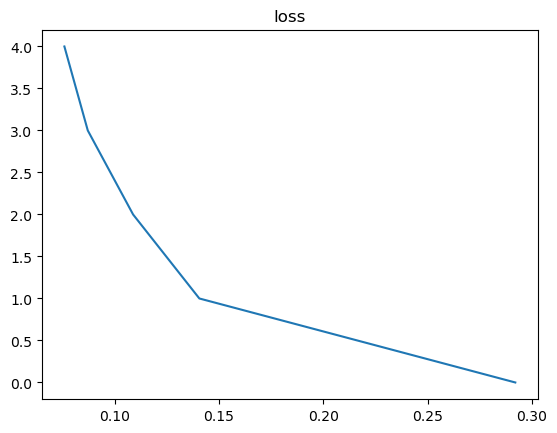

In [ ]:
plt.plot(loss, epoch_range)
plt.title("loss")
plt.show()

In [ ]:
testing_hist = model.evaluate(x_test, y_test, verbose = 2)

313/313 - 0s - loss: 0.0689 - accuracy: 0.9780 - 441ms/epoch - 1ms/step
